# FEATURES

In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [41]:
# Load dataset
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])

In [42]:
df.columns

Index(['testo 160 IAQ_51616135_outdoor [ppm]',
       'testo 160 IAQ_51616135_outdoor [°C]',
       'testo 160 IAQ_51616135_outdoor [mbar]',
       'testo 160 IAQ_51616135_outdoor [%RH]',
       'testo 160 IAQ_51616135_outdoor [°C td]',
       'testo 160 IAQ_51616135_outdoor [g/m³]', 'DateTime',
       'testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [°C]',
       'testo 160 IAQ_51616142 [mbar]', 'testo 160 IAQ_51616142 [%RH]',
       'testo 160 IAQ_51616142 [°C td]', 'testo 160 IAQ_51616142 [g/m³]',
       'Computer - kWatts', 'Plug Load (kWatts)', 'Air Conditioner-kWatts',
       'light + fan - kWatts ', 'Energy Demand (kW)', 'Energy Demand'],
      dtype='object')

In [43]:
import pandas as pd

# Assuming your DataFrame is named df and has a column 'Energy Demand'
df['Energy Demand Lag1'] = df['Energy Demand'].shift(1)
# Add EMA with a span of 5 (can be adjusted)
df['Energy Demand EMA5'] = df['Energy Demand'].ewm(span=5, adjust=False).mean().shift(1)
# Ensure DateTime is datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract weekday and hour
df['working'] = df['DateTime'].apply(
    lambda x: 1 if (x.weekday() < 5 and 9 <= x.hour < 18) else 0
)


In [44]:
df

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],DateTime,testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],...,testo 160 IAQ_51616142 [g/m³],Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Energy Demand (kW),Energy Demand,Energy Demand Lag1,Energy Demand EMA5,working
0,0.014164,-0.032,0.407407,-0.029412,-0.232323,-0.437186,2023-03-07 00:00:00,-0.860390,0.276836,0.481481,...,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,NaN,NaN,0
1,0.002833,-0.040,0.407407,-0.045455,-0.262626,-0.467337,2023-03-07 00:15:00,-0.860390,0.265537,0.481481,...,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0
2,0.025496,-0.048,0.407407,-0.021390,-0.242424,-0.447236,2023-03-07 00:30:00,-0.853896,0.265537,0.481481,...,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0
3,0.019830,-0.056,0.407407,-0.045455,-0.282828,-0.477387,2023-03-07 00:45:00,-0.857143,0.265537,0.481481,...,-0.428571,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0
4,0.031161,-0.056,0.407407,-0.072193,-0.303030,-0.497487,2023-03-07 01:00:00,-0.863636,0.254237,0.481481,...,-0.428571,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,-0.869688,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 22:45:00,-0.930195,-0.694915,0.629630,...,-0.542857,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729,-0.878986,-0.878386,0
15610,-0.830028,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 23:00:00,-0.939935,-0.694915,0.629630,...,-0.542857,-0.730469,-1.0,-1.0,-1.0,-3.730469,-0.874121,-0.874729,-0.877167,0
15611,-0.801700,-0.704,0.629630,0.724599,-0.383838,-0.527638,2024-01-01 23:15:00,-0.926948,-0.694915,0.629630,...,-0.542857,-0.733073,-1.0,-1.0,-1.0,-3.733073,-0.875337,-0.874121,-0.876152,0
15612,-0.796034,-0.704,0.629630,0.732620,-0.373737,-0.517588,2024-01-01 23:30:00,-0.926948,-0.694915,0.629630,...,-0.542857,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729,-0.875337,-0.875880,0


In [45]:
# Step 1: Extract 15-min time slot from DateTime
df['TimeSlot'] = df['DateTime'].dt.time

# Step 2: Mark if energy was used (> 0)
df['Used'] = (df['Energy Demand'] > -1).astype(int)

# Step 3: Compute usage probability per time slot
prob_map = df.groupby('TimeSlot')['Used'].mean()

# Step 4: Map probability back to each row
df['Usage Probability'] = df['TimeSlot'].map(prob_map)

# (Optional) Drop helper columns
df.drop(['TimeSlot', 'Used'], axis=1, inplace=True)
df['Usage Probability'] = scaler.fit_transform(df[['Usage Probability']])


In [46]:
df

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],DateTime,testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],...,Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Energy Demand (kW),Energy Demand,Energy Demand Lag1,Energy Demand EMA5,working,Usage Probability
0,0.014164,-0.032,0.407407,-0.029412,-0.232323,-0.437186,2023-03-07 00:00:00,-0.860390,0.276836,0.481481,...,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,NaN,NaN,0,-0.968613
1,0.002833,-0.040,0.407407,-0.045455,-0.262626,-0.467337,2023-03-07 00:15:00,-0.860390,0.265537,0.481481,...,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0,-0.968613
2,0.025496,-0.048,0.407407,-0.021390,-0.242424,-0.447236,2023-03-07 00:30:00,-0.853896,0.265537,0.481481,...,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0,-0.968613
3,0.019830,-0.056,0.407407,-0.045455,-0.282828,-0.477387,2023-03-07 00:45:00,-0.857143,0.265537,0.481481,...,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0,-0.906987
4,0.031161,-0.056,0.407407,-0.072193,-0.303030,-0.497487,2023-03-07 01:00:00,-0.863636,0.254237,0.481481,...,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000,-1.000000,-1.000000,0,-0.906987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,-0.869688,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 22:45:00,-0.930195,-0.694915,0.629630,...,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729,-0.878986,-0.878386,0,-0.769455
15610,-0.830028,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 23:00:00,-0.939935,-0.694915,0.629630,...,-0.730469,-1.0,-1.0,-1.0,-3.730469,-0.874121,-0.874729,-0.877167,0,-0.891956
15611,-0.801700,-0.704,0.629630,0.724599,-0.383838,-0.527638,2024-01-01 23:15:00,-0.926948,-0.694915,0.629630,...,-0.733073,-1.0,-1.0,-1.0,-3.733073,-0.875337,-0.874121,-0.876152,0,-0.830705
15612,-0.796034,-0.704,0.629630,0.732620,-0.373737,-0.517588,2024-01-01 23:30:00,-0.926948,-0.694915,0.629630,...,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729,-0.875337,-0.875880,0,-0.769455


In [47]:
df.to_excel('CleanData/FeatureDataset.xlsx', index=False)


# LINEAR MODEL

In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Load dataset
df = pd.read_excel("CleanData/FeatureDataset.xlsx")  # Replace with actual file path

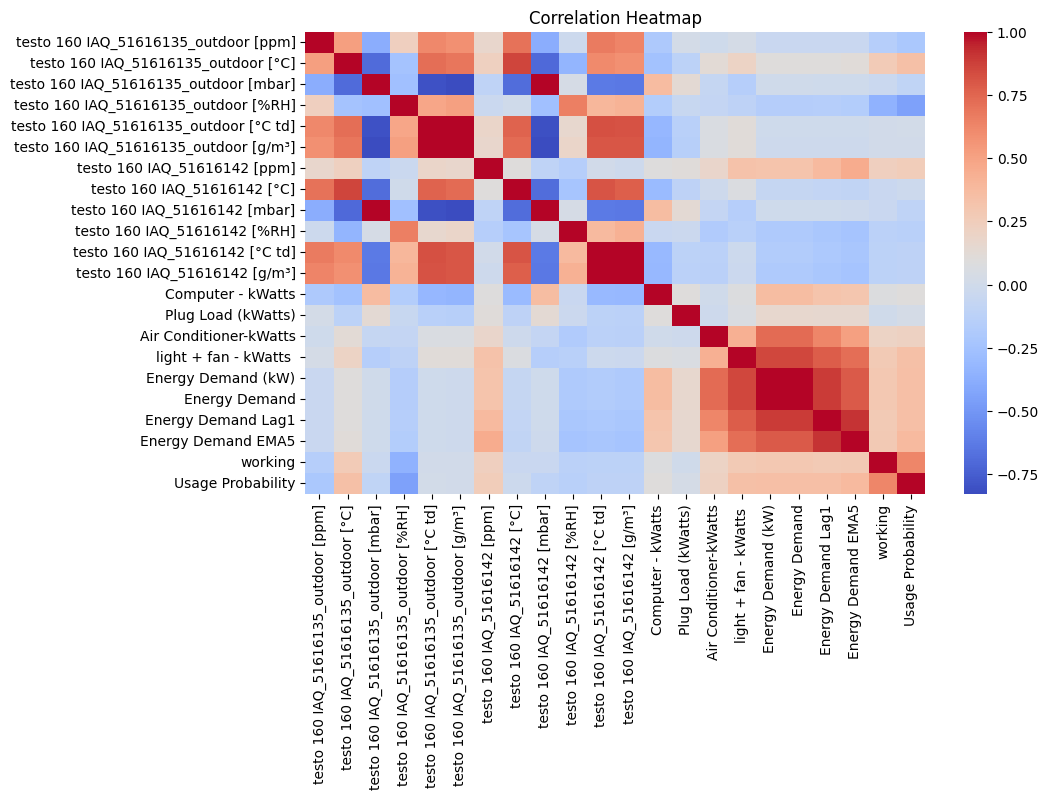

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.dropna()
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [51]:
df.columns

Index(['testo 160 IAQ_51616135_outdoor [ppm]',
       'testo 160 IAQ_51616135_outdoor [°C]',
       'testo 160 IAQ_51616135_outdoor [mbar]',
       'testo 160 IAQ_51616135_outdoor [%RH]',
       'testo 160 IAQ_51616135_outdoor [°C td]',
       'testo 160 IAQ_51616135_outdoor [g/m³]', 'DateTime',
       'testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [°C]',
       'testo 160 IAQ_51616142 [mbar]', 'testo 160 IAQ_51616142 [%RH]',
       'testo 160 IAQ_51616142 [°C td]', 'testo 160 IAQ_51616142 [g/m³]',
       'Computer - kWatts', 'Plug Load (kWatts)', 'Air Conditioner-kWatts',
       'light + fan - kWatts ', 'Energy Demand (kW)', 'Energy Demand',
       'Energy Demand Lag1', 'Energy Demand EMA5', 'working',
       'Usage Probability'],
      dtype='object')

In [52]:
# Compute correlation with Energy Demand
correlation_threshold = 0.3
target = "Energy Demand"  # Adjust this based on your dataset
dfn = df.copy()
dfn = dfn.drop(columns=['Computer - kWatts', 'Air Conditioner-kWatts', 'light + fan - kWatts ', 'Energy Demand (kW)'], errors='ignore')

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [53]:
selected_features

['testo 160 IAQ_51616142 [ppm]',
 'Energy Demand Lag1',
 'Energy Demand EMA5',
 'Usage Probability']

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Choose your 4 individual features
individual_features = selected_features[:4]  # You can customize this
results = {}

for feature in individual_features:
    X = dfn[[feature]]
    y = dfn[target]
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[feature] = {'R²': round(r2, 3), 'RMSE': round(rmse, 3)}
    print(f"Feature: {feature} — R²: {r2:.3f}, RMSE: {rmse:.3f}")


Feature: testo 160 IAQ_51616142 [ppm] — R²: 0.108, RMSE: 0.293
Feature: Energy Demand Lag1 — R²: 0.807, RMSE: 0.136
Feature: Energy Demand EMA5 — R²: 0.656, RMSE: 0.182
Feature: Usage Probability — R²: 0.123, RMSE: 0.290


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

ema_windows = [1, 2, 3, 4, 5, 10, 15, 30]
results = []
for window in ema_windows:
    ema_col = f"Energy Demand EMA{window}"
    if ema_col not in dfn.columns:
        dfn[ema_col] = dfn['Energy Demand'].ewm(span=window, adjust=False).mean().shift(1)  # Shift to avoid look-ahead bias
        #dfn[ema_col] = dfn[ema_col]  # Shift to avoid look-ahead bias

    # Drop NaNs from initial rows due to shift
    df_temp = dfn[[ema_col, 'Energy Demand']].dropna()

    X = df_temp[[ema_col]]
    y = df_temp['Energy Demand']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({'EMA': ema_col, 'R²': round(r2, 3), 'RMSE': round(rmse, 3)})


# Display results
import pandas as pd
results_df = pd.DataFrame(results).sort_values('R²', ascending=False)
print(results_df)


                   EMA     R²   RMSE
0   Energy Demand EMA1  0.766  0.149
1   Energy Demand EMA2  0.710  0.166
2   Energy Demand EMA3  0.668  0.177
4   Energy Demand EMA5  0.656  0.182
3   Energy Demand EMA4  0.634  0.186
5  Energy Demand EMA10  0.507  0.216
6  Energy Demand EMA15  0.439  0.231
7  Energy Demand EMA30  0.309  0.256


In [56]:
dfn[['Energy Demand', 'Energy Demand EMA2']].head(10)


,Energy Demand,Energy Demand EMA2
1,-1.0,NaN
2,-1.0,-1.0
3,-1.0,-1.0
4,-1.0,-1.0
5,-1.0,-1.0
6,-1.0,-1.0
7,-1.0,-1.0
8,-1.0,-1.0
9,-1.0,-1.0
10,-1.0,-1.0


# BAGGING

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [99]:
df = pd.read_excel("CleanData/FeatureDataset.xlsx")  # Replace with actual file path

In [100]:
correlation_threshold = 0.3
target = "Energy Demand"  # Adjust this based on your dataset
df.dropna(inplace=True)  # Drop rows with NaN values
dfn = df.copy()
dfn = dfn.drop(columns=['Computer - kWatts', 'Air Conditioner-kWatts', 'light + fan - kWatts ', 'Energy Demand (kW)'], errors='ignore')

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [101]:
selected_features   

['testo 160 IAQ_51616142 [ppm]',
 'Energy Demand Lag1',
 'Energy Demand EMA5',
 'Usage Probability']

In [102]:


# Remove highly correlated features using VIF
X = dfn[selected_features]
X = sm.add_constant(X)  # Add intercept for VIF computation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Keep features with VIF < 5
#final_features = vif_data[vif_data["VIF"] < 5]["Feature"].tolist()
#final_features = [f for f in final_features if f != "const"]  # Remove intercept if present
final_features = selected_features
# Prepare final dataset
X = dfn[final_features]
y = dfn[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor with Linear Regression Base Model
base_model = LinearRegression()
bagging_model = BaggingRegressor(base_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_ba = bagging_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ba))

print(f"Selected Features: {final_features}")
print(f"Bagging RMSE: {rmse:.3f}")


Selected Features: ['testo 160 IAQ_51616142 [ppm]', 'Energy Demand Lag1', 'Energy Demand EMA5', 'Usage Probability']
Bagging RMSE: 0.135


# BOOSTING

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [104]:
df = pd.read_excel("CleanData/FeatureDataset.xlsx")  # Replace with actual file path

In [105]:
correlation_threshold = 0.3
target = "Energy Demand"  # Adjust this based on your dataset
df.dropna(inplace=True)  # Drop rows with NaN values
dfn = df.copy()
dfn = dfn.drop(columns=['Computer - kWatts', 'Air Conditioner-kWatts', 'light + fan - kWatts ', 'Energy Demand (kW)'], errors='ignore')

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [106]:
selected_features

['testo 160 IAQ_51616142 [ppm]',
 'Energy Demand Lag1',
 'Energy Demand EMA5',
 'Usage Probability']

In [107]:
final_features = selected_features
X = dfn[final_features].copy()
X.columns = [col.replace(" ", "_").replace("[", "").replace("]", "").replace("%", "percent") for col in X.columns]


y = dfn[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Boosting Model (XGBoost)
boosting_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,gamma =  0.15 )
boosting_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred_bo = boosting_model.predict(X_test)
rmse_boosting = np.sqrt(mean_squared_error(y_test, y_pred_bo))

print(f"Selected Features: {final_features}")
print(f"Boosting RMSE: {rmse_boosting:.3f}")

Selected Features: ['testo 160 IAQ_51616142 [ppm]', 'Energy Demand Lag1', 'Energy Demand EMA5', 'Usage Probability']
Boosting RMSE: 0.132


# LSTM

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [68]:
df = pd.read_excel("CleanData/FeatureDataset.xlsx")  # Replace with actual file path

In [69]:
correlation_threshold = 0.3
target = "Energy Demand"  # Adjust this based on your dataset
df.dropna(inplace=True)  # Drop rows with NaN values
dfn = df.copy()
dfn = dfn.drop(columns=['Computer - kWatts', 'Air Conditioner-kWatts', 'light + fan - kWatts ', 'Energy Demand (kW)'], errors='ignore')

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [70]:

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# 🔵 Scale Data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 🔴 Convert to Sequential Format for LSTM (Timesteps = 10)
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10  # Use past 10 observations
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# 🟡 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False)

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)


In [71]:

# 🟣 Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])  # Use last time step output

# Instantiate model
input_size = X_train.shape[2]  # Number of features
LSTM_model = LSTMModel(input_size)

# Define loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=0.01)

# 🔵 Train the Model
epochs = 50
for epoch in range(epochs):
    LSTM_model.train()
    optimizer.zero_grad()
    y_pred = LSTM_model(X_train_torch)
    loss = criterion(y_pred, y_train_torch)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.0270
Epoch 10, Loss: 0.0218
Epoch 20, Loss: 0.0152
Epoch 30, Loss: 0.0122
Epoch 40, Loss: 0.0109


In [72]:

# 🟠 Evaluate Model
LSTM_model.eval()
with torch.no_grad():
    y_pred_test = LSTM_model(X_test_torch)

# Convert predictions back to original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred_test)
y_test_rescaled = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"LSTM RMSE: {rmse:.3f}")

LSTM RMSE: 0.122


# ENSEMBLE

In [111]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch

# --- Data prep ---
X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# Scale
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# --- Create sequences ---
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# --- Train-Test Split ---
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False
)

# --- Convert to PyTorch tensors ---
X_train_torch = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_seq, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_torch = torch.tensor(y_test_seq, dtype=torch.float32)


In [113]:
lstm_model = LSTM_model

In [114]:
import numpy as np
from sklearn.linear_model import LinearRegression

# --- Get predictions from bagging and boosting models ---
X_test_flat = X_test_seq[:, -1, :]  # LSTM input uses sequences, but sklearn expects flat input
y_pred_bagging = bagging_model.predict(X_test_flat)
y_pred_boosting = boosting_model.predict(X_test_flat)

# --- Predict with LSTM (PyTorch) ---
lstm_model.eval()
with torch.no_grad():
    y_pred_lstm = lstm_model(X_test_torch).cpu().numpy().flatten()  # shape: (n_samples,)

# --- Stack predictions to train meta-model ---
stacked_preds = np.vstack([y_pred_bagging, y_pred_boosting, y_pred_lstm]).T  # shape: (n_samples, 3)

# --- Prepare target (rescale y_test_seq if needed) ---
y_true = y_test_seq  # or scaler_y.inverse_transform(y_test_seq) if working in original scale

# --- Train meta-model ---
meta_model = LinearRegression()
meta_model.fit(stacked_preds, y_true)

# --- Final prediction ---
final_prediction = meta_model.predict(stacked_preds)



d:\Program Files\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_true, final_prediction))
print(f"Stacking Ensemble RMSE: {rmse:.4f}")


Stacking Ensemble RMSE: 0.0594


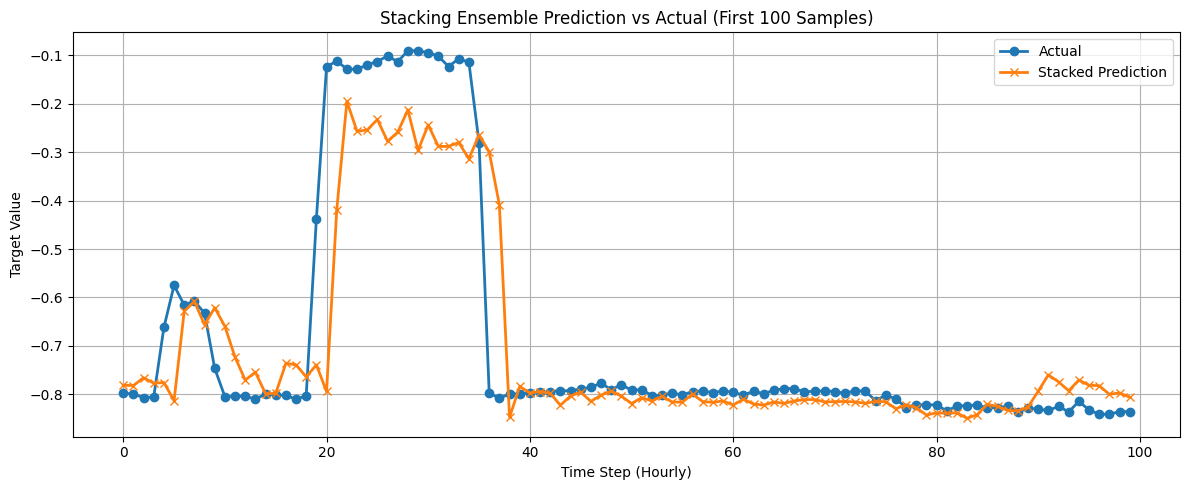

In [116]:
import matplotlib.pyplot as plt

# Optional: Inverse transform to original scale
y_true_orig = scaler_y.inverse_transform(y_true)
final_pred_orig = scaler_y.inverse_transform(final_prediction)

# Plot the first N hours (e.g., 100 samples)
N = 100
plt.figure(figsize=(12, 5))
plt.plot(y_true_orig[:N], label='Actual', marker='o', linewidth=2)
plt.plot(final_pred_orig[:N], label='Stacked Prediction', marker='x', linewidth=2)
plt.title(f'Stacking Ensemble Prediction vs Actual (First {N} Samples)')
plt.xlabel('Time Step (Hourly)')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
